# Deep Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Sample data 

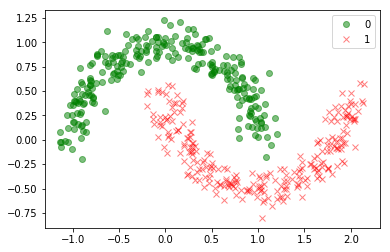

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples = 500, noise=0.1, random_state=0)
plt.plot(x[y==0, 0], x[y==0, 1], 'og', alpha=0.5)
plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
x.shape

(500, 2)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train with Logistic Regression (Sigmoid)

In [6]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
350/350 [==============================] - 0s - loss: 0.5799 - acc: 0.8343     
Epoch 2/200
350/350 [==============================] - 0s - loss: 0.4451 - acc: 0.8229     
Epoch 3/200
350/350 [==============================] - 0s - loss: 0.3803 - acc: 0.8314     
Epoch 4/200
350/350 [==============================] - 0s - loss: 0.3465 - acc: 0.8400     
Epoch 5/200
350/350 [==============================] - 0s - loss: 0.3278 - acc: 0.8429     
Epoch 6/200
350/350 [==============================] - 0s - loss: 0.3149 - acc: 0.8429     
Epoch 7/200
350/350 [==============================] - 0s - loss: 0.3051 - acc: 0.8486     
Epoch 8/200
350/350 [==============================] - 0s - loss: 0.2975 - acc: 0.8514     
Epoch 9/200
350/350 [==============================] - 0s - loss: 0.2903 - acc: 0.8629     
Epoch 10/200
350/350 [==============================] - 0s - loss: 0.2849 - acc: 0.8629     
Epoch 11/200
350/350 [==============================] - 0s - loss: 0.2800 - acc

350/350 [==============================] - 0s - loss: 0.2567 - acc: 0.8714     
Epoch 88/200
350/350 [==============================] - 0s - loss: 0.2553 - acc: 0.8743     
Epoch 89/200
350/350 [==============================] - 0s - loss: 0.2568 - acc: 0.8686     - ETA: 0s - loss: 0.2795 - acc: 0.857
Epoch 90/200
350/350 [==============================] - 0s - loss: 0.2589 - acc: 0.8743     
Epoch 91/200
350/350 [==============================] - 0s - loss: 0.2574 - acc: 0.8743     
Epoch 92/200
350/350 [==============================] - 0s - loss: 0.2557 - acc: 0.8686     
Epoch 93/200
350/350 [==============================] - ETA: 0s - loss: 0.2106 - acc: 0.895 - 0s - loss: 0.2564 - acc: 0.8743     
Epoch 94/200
350/350 [==============================] - 0s - loss: 0.2558 - acc: 0.8771     
Epoch 95/200
350/350 [==============================] - 0s - loss: 0.2560 - acc: 0.8714     
Epoch 96/200
350/350 [==============================] - 0s - loss: 0.2558 - acc: 0.8714     
Epoch 97

350/350 [==============================] - 0s - loss: 0.2555 - acc: 0.8771     
Epoch 173/200
350/350 [==============================] - 0s - loss: 0.2557 - acc: 0.8686     
Epoch 174/200
350/350 [==============================] - 0s - loss: 0.2565 - acc: 0.8686     
Epoch 175/200
350/350 [==============================] - 0s - loss: 0.2558 - acc: 0.8714     
Epoch 176/200
350/350 [==============================] - 0s - loss: 0.2553 - acc: 0.8743     
Epoch 177/200
350/350 [==============================] - 0s - loss: 0.2560 - acc: 0.8743     
Epoch 178/200
350/350 [==============================] - 0s - loss: 0.2553 - acc: 0.8743     
Epoch 179/200
350/350 [==============================] - 0s - loss: 0.2555 - acc: 0.8714     
Epoch 180/200
350/350 [==============================] - 0s - loss: 0.2557 - acc: 0.8714     
Epoch 181/200
350/350 [==============================] - 0s - loss: 0.2577 - acc: 0.8743     
Epoch 182/200
350/350 [==============================] - 0s - loss: 0.2556

In [8]:
results = model.evaluate(x_test, y_test)

 32/150 [=====>........................] - ETA: 0s

In [9]:
results

[0.26472854375839233, 0.88666666825612384]

In [11]:
print("The Accuracy score on Train set is :\t{:0.3f}", format(results[1]))

('The Accuracy score on Train set is :\t{:0.3f}', '0.886666668256')


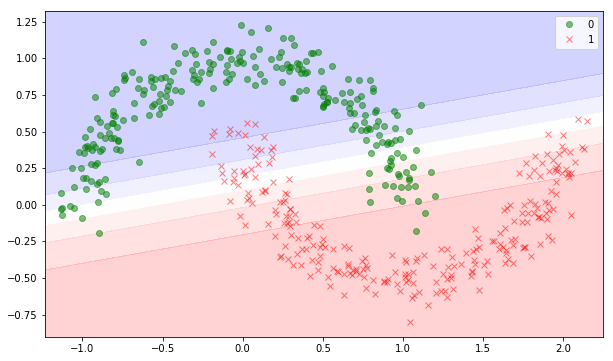

In [12]:
def plot_boundary(model, x, y):
    xmin, ymin = x.min(axis=0) - 0.1
    xmax, ymax = x.max(axis=0) + 0.1
    
    hor_ticks = np.linspace(xmin, xmax, 101)
    ver_ticks = np.linspace(ymin, ymax, 101)
    
    xx, yy = np.meshgrid(hor_ticks, ver_ticks)
    xy = np.c_[xx.ravel(), yy.ravel()]
    
    c = model.predict(xy)
    cc = c.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, cc, cmap='bwr', alpha=0.2)
    plt.plot(x[y==0, 0], x[y==0, 1], 'og', alpha=0.5)
    plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
plot_boundary(model, x, y)

# Deep Neural Network (DNN model)

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
350/350 [==============================] - 0s - loss: 0.4302 - acc: 0.8686     
Epoch 2/100
350/350 [==============================] - 0s - loss: 0.3150 - acc: 0.8686     
Epoch 3/100
350/350 [==============================] - 0s - loss: 0.3107 - acc: 0.8743     
Epoch 4/100
350/350 [==============================] - 0s - loss: 0.3006 - acc: 0.8686     
Epoch 5/100
350/350 [==============================] - 0s - loss: 0.2761 - acc: 0.8800     
Epoch 6/100
350/350 [==============================] - 0s - loss: 0.2722 - acc: 0.8743     
Epoch 7/100
350/350 [==============================] - 0s - loss: 0.2674 - acc: 0.8714     
Epoch 8/100
350/350 [==============================] - 0s - loss: 0.2628 - acc: 0.8657     
Epoch 9/100
350/350 [==============================] - 0s - loss: 0.2604 - acc: 0.8743     
Epoch 10/100
350/350 [==============================] - 0s - loss: 0.2641 - acc: 0.8629     
Epoch 11/100
350/350 [==============================] - 0s - loss: 0.2605 - acc

350/350 [==============================] - 0s - loss: 8.4850e-04 - acc: 1.0000     
Epoch 88/100
350/350 [==============================] - 0s - loss: 8.5219e-04 - acc: 1.0000     
Epoch 89/100
350/350 [==============================] - 0s - loss: 8.2172e-04 - acc: 1.0000     
Epoch 90/100
350/350 [==============================] - 0s - loss: 8.2170e-04 - acc: 1.0000     
Epoch 91/100
350/350 [==============================] - 0s - loss: 7.7582e-04 - acc: 1.0000     
Epoch 92/100
350/350 [==============================] - 0s - loss: 8.0790e-04 - acc: 1.0000     
Epoch 93/100
350/350 [==============================] - 0s - loss: 7.5297e-04 - acc: 1.0000     
Epoch 94/100
350/350 [==============================] - 0s - loss: 7.3745e-04 - acc: 1.0000     
Epoch 95/100
350/350 [==============================] - 0s - loss: 7.3809e-04 - acc: 1.0000     
Epoch 96/100
350/350 [==============================] - 0s - loss: 7.1495e-04 - acc: 1.0000     
Epoch 97/100
350/350 [=====================

In [15]:
model.evaluate(x_test, y_test)

 32/150 [=====>........................] - ETA: 0s

[0.00070321070495992899, 1.0]

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_train_pred = model.predict_classes(x_train)
y_test_pred = model.predict_classes(x_test)

 32/150 [=====>........................] - ETA: 0s

In [18]:
print("The Accuracy score on Train set is :\t{:0.3f}".format(accuracy_score(y_train_pred, y_train)))
print("The Accuracy score on Test set is :\t{:0.3f}".format(accuracy_score(y_test_pred, y_test)))

The Accuracy score on Train set is :	1.000
The Accuracy score on Test set is :	1.000


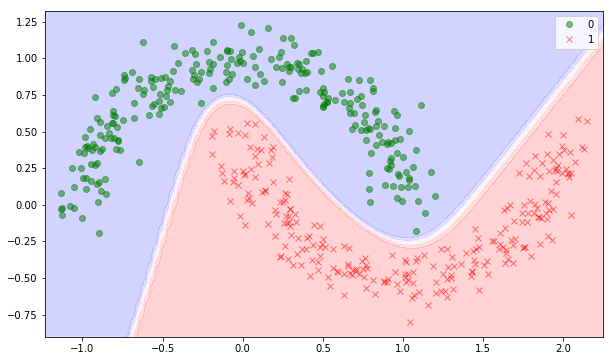

In [19]:
plot_boundary(model, x, y)